In [1]:
#@title Imports 
import numpy as np, pandas as pd, matplotlib.pyplot as plt, matplotlib as mpl
import tjy_udf as tjy
from Data import Data
from Pha3D import Pha3D
print("tjy_udf: ", list(filter(lambda x: '__' not in x, dir(tjy)))) # Print contained functions
mpl.rc_file('tjy.mplstyle')

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', None)
DISPLAY_SORTED = True
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib import ticker
from matplotlib.ticker import (AutoMinorLocator, MultipleLocator)
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
    
#GIT = 'https://github.com/tyokokur/tmpdat/raw/main/sysg3/'
#''' If SSL error _ssl.c:997: 
#    pip install --upgrade certifi'''

from sysg3_data import *


leg_labs=['Micelle', 'Iso. Stripe', 'Fused Stripe', 'Hole', 'Cylinder', 'Cyl. Necklace', 'Cyl. Stripe', 'Raised Stripe', 'Homogeneous']

tjy_udf:  ['CalcF', 'H_find', 'Heights', 'Kap_D', 'elread', 'get_fp', 'get_fs', 'git_sync', 'lighten_color', 'phread', 'phreadxyz', 'plot_anim', 'plot_pha', 'plot_pha_feed', 'ticks']


In [28]:
## Local
fp_work, fp_home = 'C:/Users/takas/Downloads/', 'E:/Downloads/' 
fp = fp_work

## Files needed locally
f1_fnames = []

f3_fnames = ['ph_a10s25e3_mic-1.dat', 'str', 'ph_a10s5e3_hol15-3.dat', 'fus', 'ph_a10s010_hom-1.dat']
f3_boxes  = [(21.3, 18.3, 32.2), (0,0,0), (27.2, 32.2, 36.2), (0,0,0), (20.2, 20.2, 48.2)]

f6_fnames = ['ph_a20s020_mic-mul.dat', 'ph_a30s020_str-mul.dat', 'ph_a30s040_hom-mul.dat']
f6_boxes  = []

# Figure 1

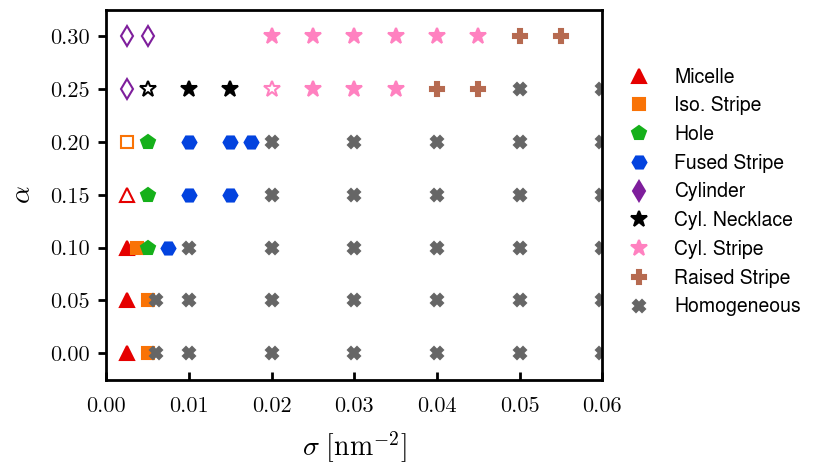

In [12]:
morph_ms = {
    'mic': {'marker':'^', 'c':'xkcd:red'  , 'ms':10}, 
    'str': {'marker':'s', 'c':'xkcd:orange', 'ms':8 }, 
    'hol': {'marker':'p', 'c':'xkcd:green' , 'ms':10}, 
    'fus': {'marker':'H', 'c':'xkcd:blue', 'ms':10}, 
    'cyl': {'marker':'d', 'c':'xkcd:purple', 'ms':10},
    'cyl-pn': {'marker':'*', 'c':'xkcd:black', 'ms':12},
    'cyl-str': {'marker':'*', 'c':'xkcd:pink', 'ms':12},
    'raised': {'marker':'P', 'c':'xkcd:clay', 'ms':10},
    'hom': {'marker':'X', 'c':'0.4' , 'ms':8}
}
leg_ms = [Line2D([0],[0], **morph_ms[mor], lw=0) for mor in morph_ms.keys()]
leg_labs=['Micelle', 'Iso. Stripe', 'Hole', 'Fused Stripe', 'Cylinder', 'Cyl. Necklace', 'Cyl. Stripe', 'Raised Stripe', 'Homogeneous']

def get_Morph(a,s):
    AX = All.all[All.all.loc[:,'alpha'] == a]
    AXSY = AX[AX.loc[:,'sigma'] == s].reset_index()
    return AXSY.morph[np.nanargmin([i.minF() for i in AXSY.data])], min([i.minF() for i in AXSY.data]), AXSY.multi[np.nanargmin([i.minF() for i in AXSY.data])], AXSY.done.to_list()

# Not { (0.0, 7e-03), (0.05, 7e-03), (0.1, 1.25e-02), (0.1, 6.25e-03), (0.2, 0.022), (0.2, 0.025), (0.2, 0.027) [(0.225,i) for i in (2.5e-02, 2.75e-02, 3e-02)] 
#       (0.25, 2.7e-02), (0.25, 3.25e-02), (0.30, 3.25e-02) }

for (a,s) in [(0.00, i) for i in (2.5e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.05, i) for i in (2.5e-03, 5e-03, 6e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.10, i) for i in (2.5e-03, 3.75e-03, 5e-03, 7.5e-03, 1e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.15, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.20, i) for i in (2.5e-03, 5e-03, 1e-02, 1.5e-02, 1.75e-02, 2e-02, 3e-02, 4e-02, 5e-02, 6e-02)] +\
             [(0.25, i) for i in (2.5e-03, 5e-03, 1.0e-02, 1.5e-02, 2e-02, 2.5e-02, 3e-02, 3.5e-02, 4.0e-02, 4.5e-02, 5e-02, 6e-02)] +\
             [(0.30, i) for i in (2.5e-03, 5e-03, 2e-02, 2.5e-02, 3e-02, 3.5e-02, 
                                  4e-02, 4.5e-02, 5e-02, 5.5e-02)]:
    try: morph, minF, mul, done = get_Morph(a,s)
    except ValueError: 
        print("Error: Couldn't find {}, {}".format(a, s))
        break
    x,y,mor = s, a, morph
    
    if done == [True]*len(done): 
        if mul:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc=tjy.lighten_color(morph_ms[mor]['c'], 0.3))
        else:     plt.plot(x,y, lw=0, **morph_ms[mor])
    else:  plt.plot(x,y, lw=0, **morph_ms[mor], mfc='w')

plt.xlabel(r'$\sigma\ [\mathrm{nm}^{-2}]$')
plt.xlim(0, 0.060)
plt.ylabel(r'$\alpha$')
plt.ylim(-0.025,0.325)
plt.legend(leg_ms, leg_labs, loc=(1.02,0.15))
tjy.ticks()

# Figure 2

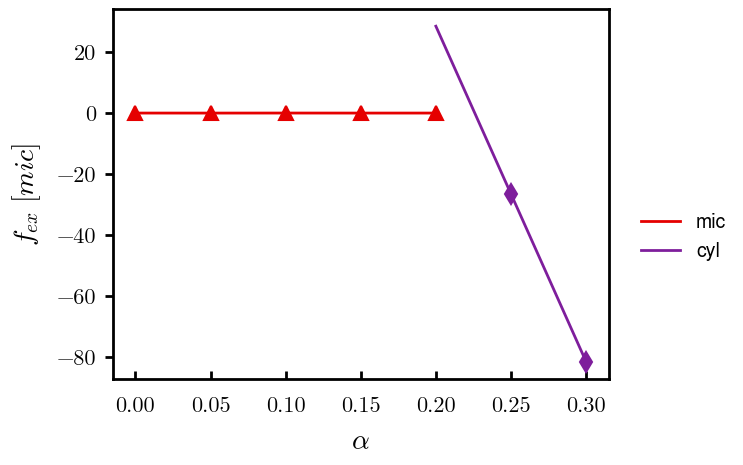

In [2]:
f = plotF('sigma', 2.5e-03, ('mic', 'cyl'), ref_morph='mic', morph_xxs = {'cyl': (0.2, 0.3)}, 
          show_raw=True, k_dict = {'mic': 2, 'cyl': 1}, s_dict = {}
)

# Figure 3

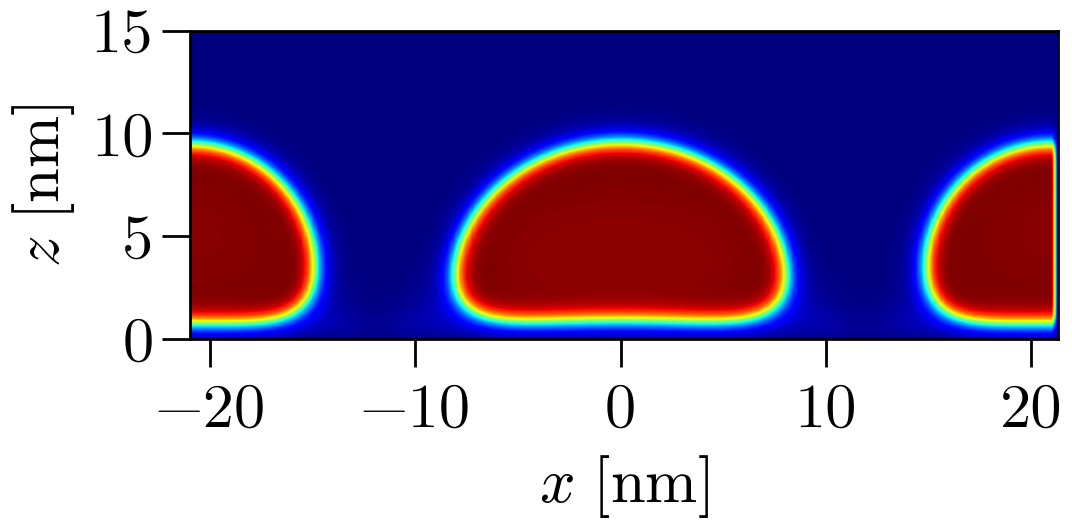

In [27]:
pha3d = Pha3D(f3_fnames[0], f3_boxes[0], discs=(0.30,0.30,0.20), fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xz', yslice=0.0, zslice=5,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=45)
h.axes[0].set_ylabel(r'$z\ [\mathrm{nm}]$', fontsize=45)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=45)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.show()

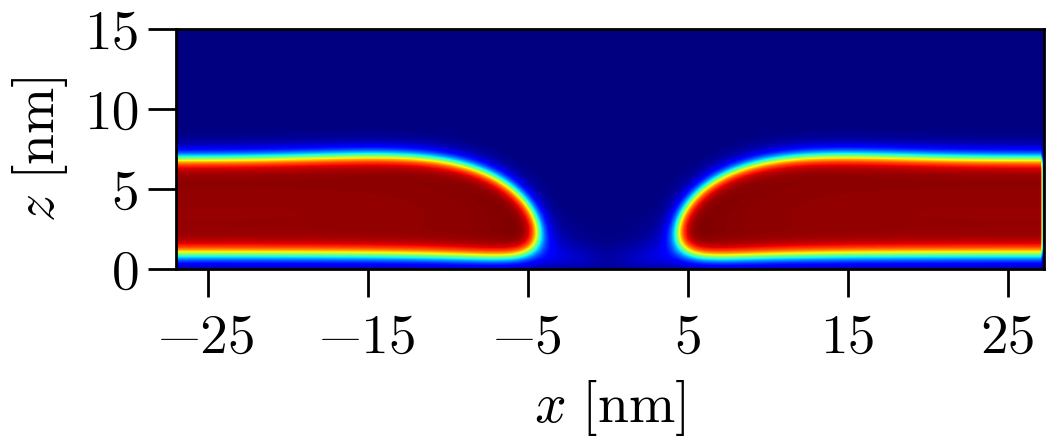

In [24]:
pha3d = Pha3D(f3_fnames[2], f3_boxes[2], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xz', yslice=f3_boxes[2][1]/2, zslice=5,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=40)
h.axes[0].set_ylabel(r'$z\ [\mathrm{nm}]$', fontsize=40)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=40)
h.axes[0].set_xticks([-25, -15, -5, 5, 15, 25])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.show()

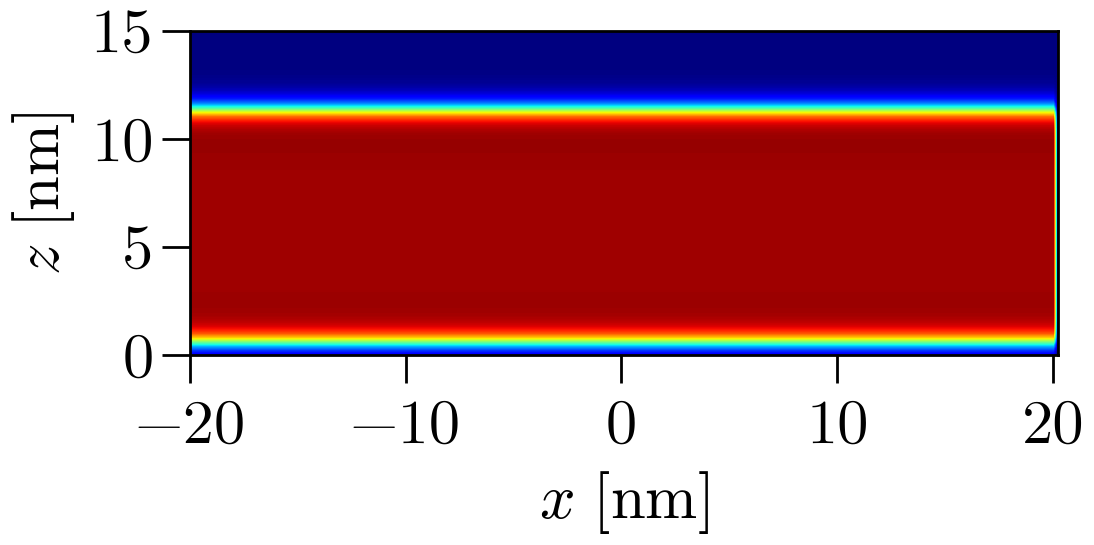

In [31]:
pha3d = Pha3D(f3_fnames[4], f3_boxes[4], fprefix=fp)

# g = pha3d.plot_vol(isomin=0.10, fprefix=fp, 
#                    n_coarse=1, zmax=15.2, reflect_over='sw', write_html=True)

h = pha3d.plot_proj(which='xz', yslice=0.0, zslice=5,
                    zmax=15.0, reflect_box=True, reflect_over='sw',  
                    show_cbar = False, vmin = 0.0, vmax = 0.80)
h.axes[0].set_title(None)
h.axes[0].set_xlabel(r'$x\ [\mathrm{nm}]$', fontsize=45)
h.axes[0].set_ylabel(r'$z\ [\mathrm{nm}]$', fontsize=45)
h.axes[0].tick_params(axis='both', direction='out', length=20, labelsize=45)
h.axes[0].set_xticks([-20, -10, 0, 10, 20])
h.axes[0].set_yticks([0, 5, 10, 15])
plt.show()

# Figure 4

C:\Users\takas\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\interpolate\_fitpack2.py:280: UserWarning: 
The maximal number of iterations maxit (set to 20 by the program)
allowed for finding a smoothing spline with fp=s has been reached: s
too small.
There is an approximation returned but the corresponding weighted sum
of squared residuals does not satisfy the condition abs(fp-s)/s < tol.
  warnings.warn(message)


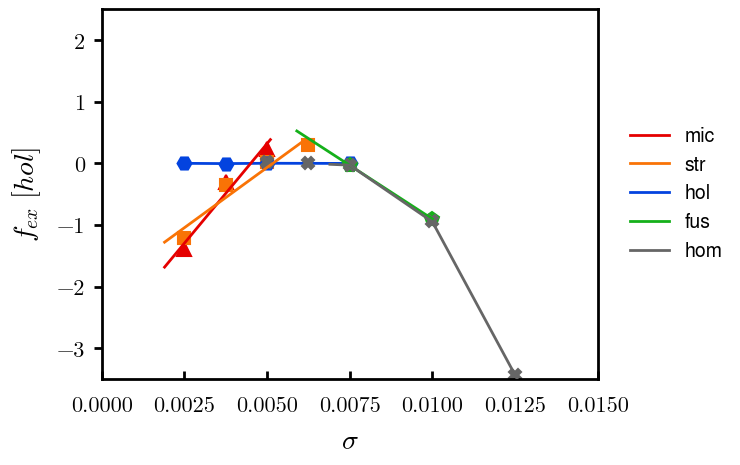

In [10]:
f = plotF('alpha', 0.10, ('mic', 'str', 'hol', 'fus', 'hom'), ref_morph='hol', 
          morph_filter = {'hom': (0.005, 0.013)}, 
          morph_xxs = {'mic': (2e-03, 5e-03), 'str': (2e-03, 6e-03), 'fus': (0.006, 0.010), 'hom':(0.007, 0.013)},
          show_raw=True, s_dict = {'hol':1e-07, 'mic':1e-01, 'str':1e-01}, k_dict = {'mic': 1, 'str': 1, 'hol': 2, 'fus': 1, 'hom': 1}
)
plt.xlim(0.0, 0.015)
plt.ylim(-3.50, 2.50)
tjy.ticks()

# Figure 6

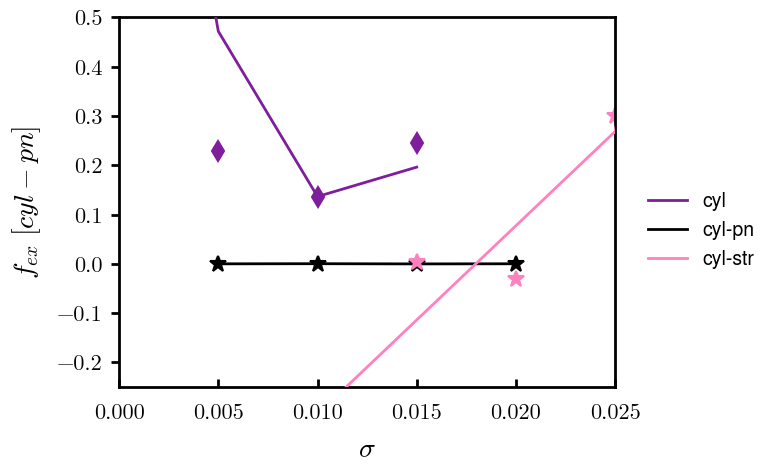

In [15]:
f = plotF('alpha', 0.25, ('cyl', 'cyl-pn', 'cyl-str'), ref_morph='cyl-pn',  show_raw=True, 
          morph_filter = {'cyl': (0, 0.015), 'cyl-pn': (0, 0.020), 'cyl-str': (0.010, 0.035)},
          morph_xxs = {'cyl': (2.5e-03, 0.015), 'cyl-pn': (2.5e-03, 0.015), 'cyl-str':(0.01, 0.050)}, 
          k_dict = {'cyl': 1, 'cyl-pn': 2, 'cyl-str': 1},
          s_dict = {'cyl-pn':1e-07, 'cyl':1e-01, 'cyl-str':1e-01}
)
plt.xlim(0.0, 0.025)
plt.ylim(-0.25, 0.50)
tjy.ticks()

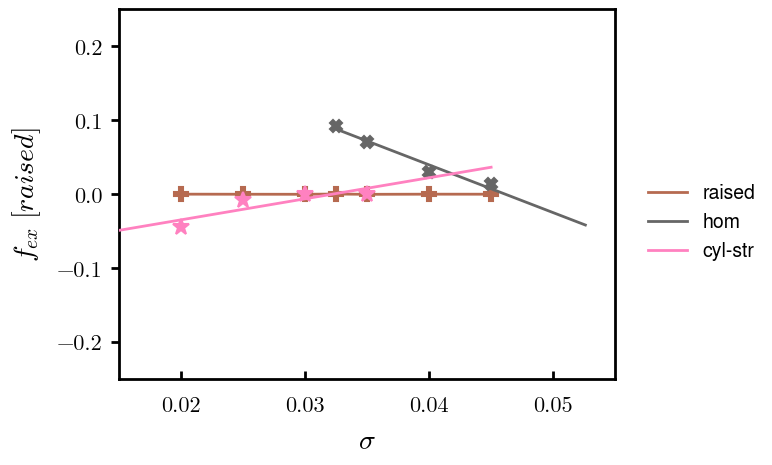

In [23]:
f = plotF('alpha', 0.25, ('raised', 'hom', 'cyl-str'), ref_morph='raised',  show_raw=True, 
          morph_filter = {'cyl': (0, 0.015), 'raised':(0.020,0.045), 'hom': (0.0325, 0.045), 'cyl-str':(0.020, 0.041)}, 
          morph_xxs = {'hom': (0.0325, 0.0525), 'cyl-str':(0.0125, 0.045)},
          k_dict = {'cyl': 1, 'cyl-pn': 1, 'cyl-str': 1, 'raised': 2, 'hom': 1}, 
          s_dict = {'raised':1e-07, 'cyl-str':1e-01, 'cyl-pn':1e-01, 'hom':1e-01}
)
plt.xlim(0.015, 0.055)
plt.ylim(-0.25, 0.25)
tjy.ticks()

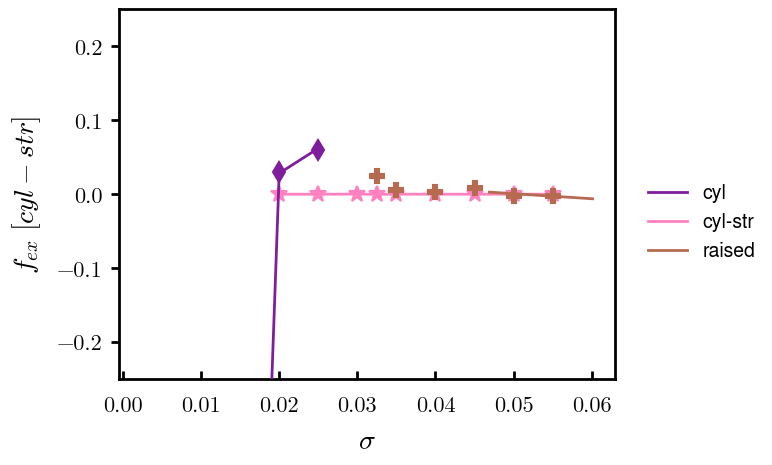

In [16]:
f = plotF('alpha', 0.30, ('cyl', 'cyl-str', 'raised'), ref_morph='cyl-str', 
          morph_filter = {'cyl' : (0, 0.025), 'cyl-str': (0,1), 'raised': (0.0325, 1)}, 
          morph_xxs = {'cyl': (2.5e-03, 0.025), 'cyl-str': (0.015, 0.055), 'raised': (0.047, 0.060)},
          show_raw=True, s_dict={'cyl': 1e-04, 'cyl-str': 1e-07, 'raised': 1e-04}, k_dict = {'cyl': 1, 'cyl-str': 2, 'raised': 1}
)
plt.ylim(-0.25, 0.25)
tjy.ticks()

# Figure 5

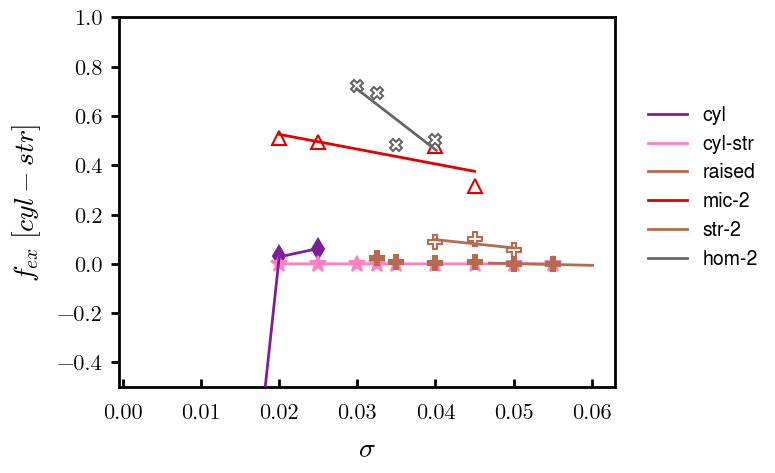

In [15]:
morph_ms = {
    'mic': {'marker':'^', 'c':'xkcd:red'  , 'ms':10}, 
    'str': {'marker':'s', 'c':'xkcd:orange', 'ms':8 }, 
    'fus': {'marker':'p', 'c':'xkcd:green', 'ms':10}, 
    'hol': {'marker':'H', 'c':'xkcd:blue' , 'ms':10}, 
    'cyl': {'marker':'d', 'c':'xkcd:purple', 'ms':10},
    'cyl-str': {'marker':'*', 'c':'xkcd:pink', 'ms':12},
    'raised': {'marker':'P', 'c':'xkcd:clay', 'ms':10},
    'hom': {'marker':'X', 'c':'0.4' , 'ms':8},
    
    'mic-2': {'marker':'^', 'c':'xkcd:red','mfc':'w',  'ms':10}, 
    'str-2': {'marker':'P', 'c':'xkcd:clay','mfc':'w', 'ms':10},
    'hom-2': {'marker':'X', 'c':'0.4','mfc':'w', 'ms':8},
}

f = plotF('alpha', 0.30, ('cyl', 'cyl-str', 'raised', 'mic-2', 'str-2', 'hom-2'), ref_morph='cyl-str', 
          morph_filter = {'cyl' : (0, 0.025), 'cyl-str': (0,1), 'raised': (0.0325, 1), 'str-2':(0.040,1), 'hom-2':(0.025, 1)}, 
          morph_xxs = {'cyl': (2.5e-03, 0.025), 'cyl-str': (0.015, 0.055), 'raised': (0.047, 0.060)},
          show_raw=True, 
          s_dict={'cyl': 1e-04, 'cyl-str': 1e-07, 'raised': 1e-04, 'mic-2': 1e-01, 'str-2': 1e-01, 'hom-2': 1e-01}, 
          k_dict = {'cyl': 1, 'cyl-str': 2, 'raised': 1, 'mic-2': 1, 'str-2':1, 'hom-2': 1}
)
plt.ylim(-0.50, 1.0)
tjy.ticks()